<a href="https://colab.research.google.com/github/a4avikumar/Image-Caption-Generator/blob/main/Image_Caption_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'flickr8k:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F623289%2F1111676%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240412%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240412T132845Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9e9649b5ac7e3e1fb8745467d3aad599658826526c67f38428b42d04fbe907ad1ed5989c8e0b07bddf14cb14880c824f0716abc0f4cb232dd64d9eaa39c42c873f9e38237a6ee206ab8ed0d6051fdebdcb978ba7cab38b8725704f648652489f58e4fc2f0f03e39cd500f4e3ecc302836a3401f5ac8ac6e3549e83f74cbc365a9a4968220953470ae3204247a3aef01a62e11a4e5669f8257779041f6f0d0e10f785b52f6fafd145571759618fbefec94f767a1a6239f7e6cf927e0a06899b8f36f10f6ff34d462077021409c179bc87a7bd24b6a9a46c08c1cb25e909585bcac3063b898e35a12797a212d863301b11e9cb383e6c93eaf66c1ae68ca7649ee5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1112971163 bytes downloaded
Downloaded and uncompressed: flickr8k
Data source import complete.


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/flickr8k/Images/1527297882_dededc7891.jpg
/kaggle/input/flickr8k/Images/3523920786_0eb63993fd.jpg
/kaggle/input/flickr8k/Images/3455419642_894d03f153.jpg
/kaggle/input/flickr8k/Images/2823575468_15f6c345fc.jpg
/kaggle/input/flickr8k/Images/2888702775_0939a6680e.jpg
/kaggle/input/flickr8k/Images/2635938723_11b85e6763.jpg
/kaggle/input/flickr8k/Images/2882483779_73c171ac19.jpg
/kaggle/input/flickr8k/Images/3591458156_f1a9a33918.jpg
/kaggle/input/flickr8k/Images/2701042060_92508ea8fa.jpg
/kaggle/input/flickr8k/Images/2472574160_8ce233f396.jpg
/kaggle/input/flickr8k/Images/2735158990_56ff6bf9b0.jpg
/kaggle/input/flickr8k/Images/2303356248_65dd6aba6f.jpg
/kaggle/input/flickr8k/Images/3716272233_7845ec5b3e.jpg
/kaggle/input/flickr8k/Images/3444974984_963fb441a0.jpg
/kaggle/input/flickr8k/Images/207275121_ee4dfa0bf2.jpg
/kaggle/input/flickr8k/Images/520491467_54cbc0a866.jpg
/kaggle/input/flickr8k/Images/3595412126_4020d4643b.jpg

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [8]:
BASE_DIR='/kaggle/input/flickr8k'
WORKING_DIR='/kaggle/working'

In [9]:
model= VGG16()

model=Model(inputs=model.inputs,outputs=model.layers[-2].output)
print(model.summary())

553467096/553467096 [==============================] - 18s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [10]:
features={}
directory=os.path.join(BASE_DIR, 'Images')

for img_name in tqdm(os.listdir(directory)):
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    image=img_to_array(image)
    image = image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
    image=preprocess_input(image)
    feature=model.predict(image,verbose=0)
    image_id=img_name.split('.')[0]
    features[image_id]=feature

  0%|          | 0/8091 [00:00<?, ?it/s]

In [11]:
pickle.dump(features,open(os.path.join(WORKING_DIR,'features.pkl'),'wb'))


In [12]:
with open(os.path.join(WORKING_DIR,'features.pkl'), 'rb') as f:
    features = pickle.load(f)

In [13]:
with open(os.path.join(BASE_DIR,'captions.txt'),'r') as f:
    next(f)
    caption_doc = f.read()

In [14]:
mapping={}
for line in tqdm(caption_doc.split('\n')):
    tokens=line.split(',')
    if len(line)<2:
        continue
    image_id,caption=tokens[0],tokens[1:]
    image_id=image_id.split('.')[0]
    caption=" ".join(caption)
    if image_id not in mapping:
        mapping[image_id]=[]
    mapping[image_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

In [15]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            caption=captions[i]
            caption=caption.lower()
            caption=caption.replace('[^A-Za-z]','')
            caption=caption.replace('\s+',' ')
            caption='<start> '+" ".join([word for word in caption.split() if len(word)>1])+' <end>'
            captions[i]=caption

In [16]:
clean(mapping)

In [17]:
mapping['743571049_68080e8751']

['<start> boy waves around sparkler <end>',
 '<start> child in red shirt plays with fireworks <end>',
 '<start> child spins sparkler leaving light trail <end>',
 '<start> little boy is holding lit sparkler in the backyard <end>',
 '<start> young boy is twisting sparkler around in the air <end>']

In [18]:
all_captions=[]
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [19]:
len(all_captions)

40455

In [20]:
tokenizer= Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size=len(tokenizer.word_index)+1

In [21]:
vocab_size

8483

In [22]:
max_length=max(len(caption.split()) for caption in all_captions)
max_length

35

In [23]:
image_ids=list(mapping.keys())
split=int(len(image_ids)*0.90)
train = image_ids[:split]
test=image_ids[split:]

In [24]:
def data_generator(data_keys,mapping,features,tokenizer,max_length,vocab_size,batch_size):
    X1,X2,y=list(),list(),list()
    n=0
    while 1:
        for key in data_keys:
            n+=1
            captions=mapping[key]
            for caption in captions:
                seq=tokenizer.texts_to_sequences([caption])[0]
                for i in range(1,len(seq)):
                    in_seq,out_seq=seq[:i],seq[i]
                    in_seq=pad_sequences([in_seq],maxlen=max_length)[0]
                    out_seq=to_categorical([out_seq],num_classes=vocab_size)[0]
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n== batch_size:
                X1,X2,y =np.array(X1),np.array(X2),np.array(y)
                yield[X1,X2],y
                X1,X2,y=list(),list(),list()
                n=0



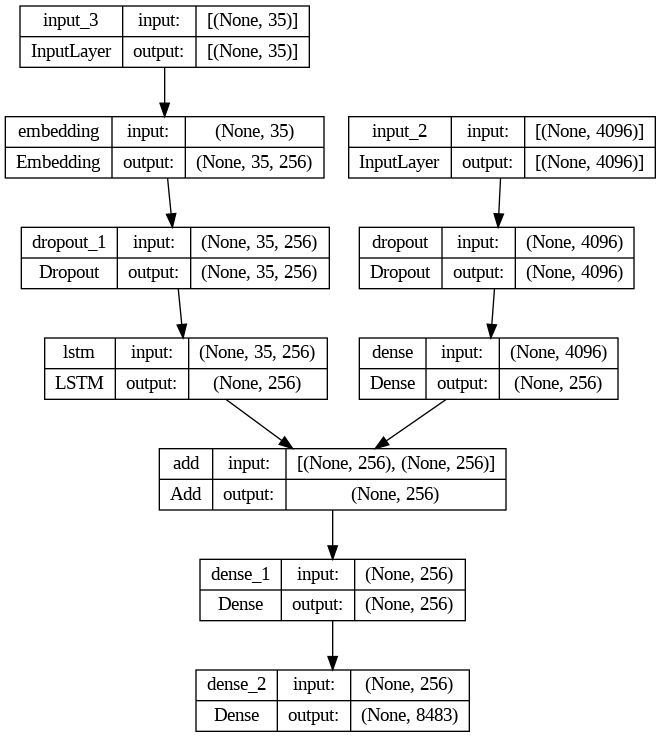

In [25]:
inputs1=Input(shape=(4096,))
fe1=Dropout(0.4)(inputs1)
fe2=Dense(256,activation='relu')(fe1)

inputs2=Input(shape=(max_length,))
se1=Embedding(vocab_size,256,mask_zero=True)(inputs2)
se2=Dropout(0.4)(se1)
se3=LSTM(256)(se2)

decoder1=add([fe2,se3])
decoder2=Dense(256,activation='relu')(decoder1)
outputs=Dense(vocab_size,activation='softmax')(decoder2)

model= Model(inputs=[inputs1,inputs2],outputs=outputs)
model.compile(loss='categorical_crossentropy',optimizer='adam')


plot_model(model,show_shapes=True)

In [26]:
epochs=15
batch_size=64
steps=len(train) // batch_size

for i in range(epochs):
    generator=data_generator(train,mapping,features,tokenizer,max_length,vocab_size,batch_size)
    model.fit(generator,epochs=1,steps_per_epoch=steps,verbose=1)

113/113 [==============================] - 52s 462ms/step - loss: 2.4872


In [27]:
model.save(WORKING_DIR+'/best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
def idx_to_word(integer,tokenizer):
  for word,index in tokenizer.word_index.items():
    if index==integer:
      return word
  return None

In [29]:
def predict_caption(model,image,tokenizer,max_lenght):
  in_text ='<start>'
  for i in range(max_length):
    sequence=tokenizer.texts_to_sequences([in_text])[0]
    sequence=pad_sequences([sequence],max_length)
    yhat=model.predict([image,sequence],verbose=0)
    yhat=np.argmax(yhat)

    word=idx_to_word(yhat,tokenizer)
    if word is None:
      break
    in_text+=" "+word
    if word=='<end>':
      break
  return in_text

In [32]:
from nltk.translate.bleu_score import corpus_bleu
actual,predicted=list(),list()

for key in tqdm(test):
  captions=mapping[key]
  y_pred=predict_caption(model,features[key],tokenizer,max_length)
  actual_captions=[caption.split() for caption in captions]
  y_pred =y_pred.split()
  actual.append(actual_captions)
  predicted.append(y_pred)

print("BLEU-1: %!" % corpus_bleu(actual,predicted,weights=(1.0,0,0,0)))
print("BLEU-2: %!" % corpus_bleu(actual,predicted,weights=(0.5,0.5,0,0)))

  0%|          | 0/810 [00:00<?, ?it/s]

ValueError: unsupported format character '!' (0x21) at index 9

In [33]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
<start> black dog and spotted dog are fighting <end>
<start> black dog and tri-colored dog playing with each other on the road <end>
<start> black dog and white dog with brown spots are staring at each other in the street <end>
<start> two dogs of different breeds looking at each other on the road <end>
<start> two dogs on pavement moving toward each other <end>
--------------------Predicted--------------------
<start> two dogs are playing with each other on the grass end end end end end end end end end end end end end end end end end end end end end end end end end


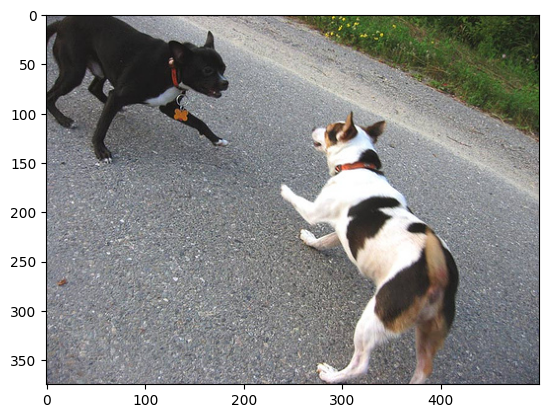

In [34]:
generate_caption("1001773457_577c3a7d70.jpg")
